<p style="background-color:#C74375;font-family:ui-rounded;color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;">Import Needed Libraries</p>


In [1]:
import os
os.environ['KMP_DUPLICATE_LIB_OK']='True'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
import random

from tensorflow.keras import layers, Sequential
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.applications import VGG16
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report

from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D

<p style="background-color:#C74375;font-family:ui-rounded;color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;">Lodaing Data </p>



In [2]:
data_train_path = r"C:\Users\Hp\Desktop\level 4_S2\Deep learning\project-CNN\vehicle-detection-image\train"
data_test_path = r"C:\Users\Hp\Desktop\level 4_S2\Deep learning\project-CNN\vehicle-detection-image\test"
data_val_path = r"C:\Users\Hp\Desktop\level 4_S2\Deep learning\project-CNN\vehicle-detection-image\val"

<p style="background-color:#C74375;font-family:ui-rounded;color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;"> Data preprocessin </p>


In [3]:
img_width = 180
img_height=180

In [4]:
train_datagen = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest')

In [5]:
train_generator = train_datagen.flow_from_directory(
    data_train_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary')

Found 14208 images belonging to 2 classes.


In [6]:
print(train_generator.class_indices)

{'non-vehicles': 0, 'vehicles': 1}


In [7]:
val_generator = train_datagen.flow_from_directory(
    data_val_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary'
)

Found 1776 images belonging to 2 classes.


In [8]:
data_test = train_datagen.flow_from_directory(
    data_test_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',  
    shuffle=False 
)

Found 1776 images belonging to 2 classes.


<p style="background-color:#C74375;font-family:ui-rounded;color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;"> Data Visualization </p>


<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;"> Plot distribution of classes in training dataset
</span>


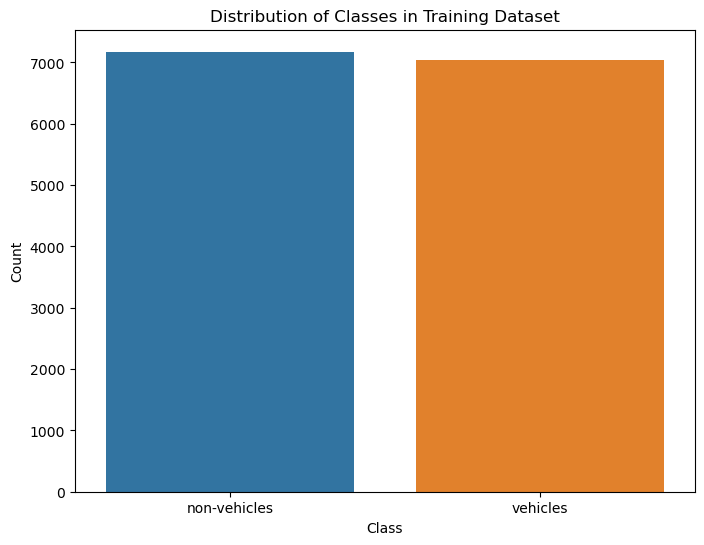

In [9]:
plt.figure(figsize=(8, 6))
sns.countplot(x=train_generator.classes)
plt.title('Distribution of Classes in Training Dataset')
plt.xlabel('Class')
plt.ylabel('Count')
plt.xticks(ticks=[0, 1], labels=train_generator.class_indices.keys())
plt.show()

<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Visualize some sample images from both classes
</span>

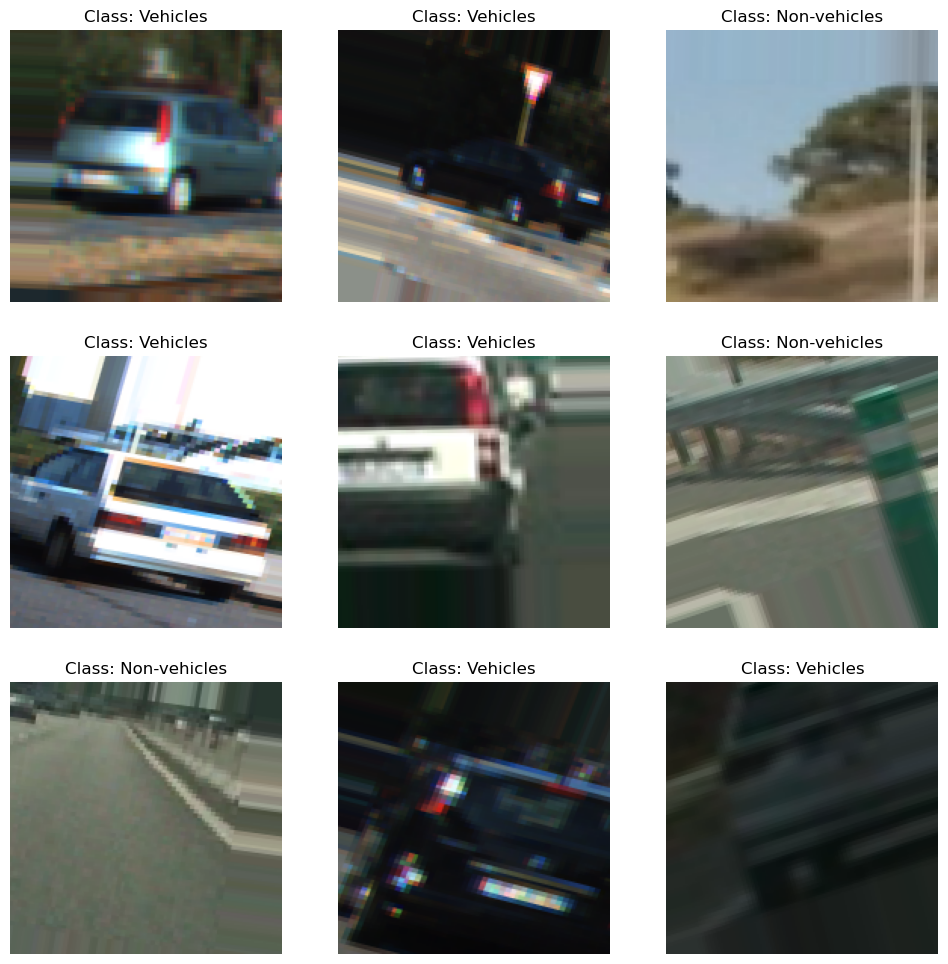

In [10]:
sample_images, sample_labels = next(train_generator)
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(sample_images[i].astype('uint8'))
    plt.title('Class: {}'.format('Non-vehicles' if sample_labels[i] == 0 else 'Vehicles'))
    plt.axis('off')
plt.show()

<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Plot some augmented images
</span>

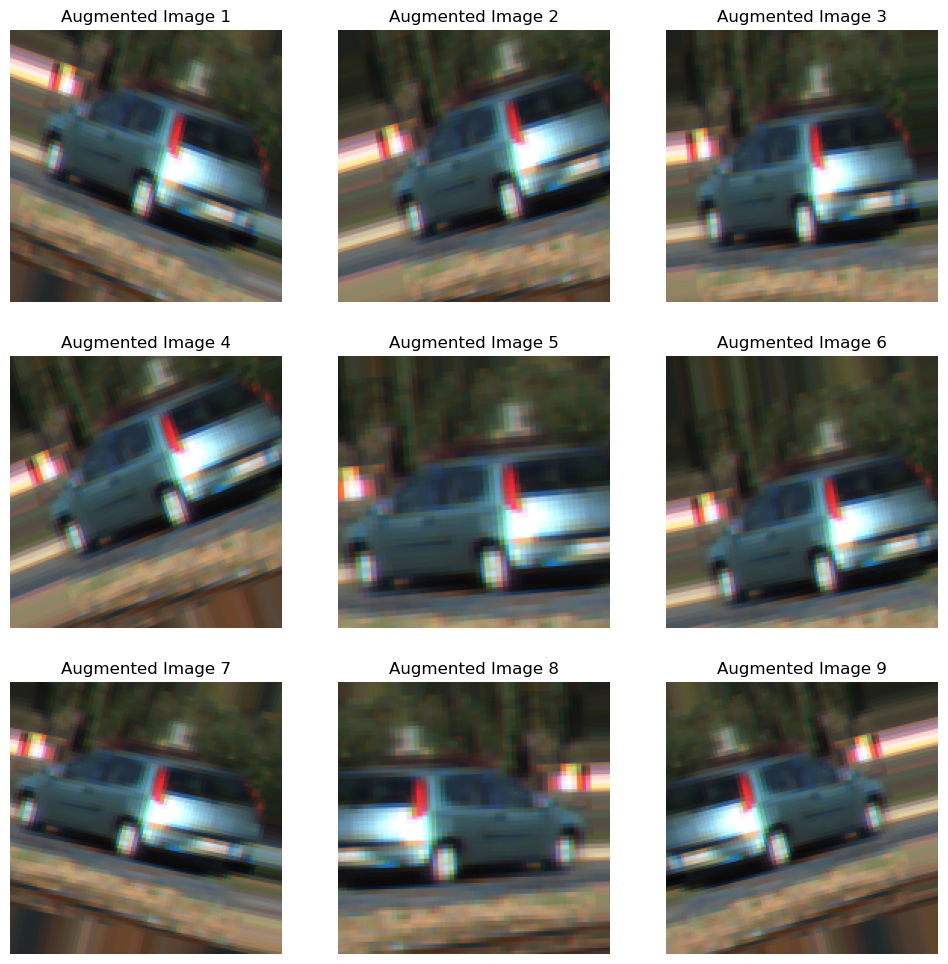

In [11]:
augmented_images = [train_generator[0][0][0] for _ in range(9)]
plt.figure(figsize=(12, 12))
for i in range(9):
    plt.subplot(3, 3, i+1)
    plt.imshow(augmented_images[i].astype('uint8'))
    plt.title('Augmented Image {}'.format(i+1))
    plt.axis('off')
plt.show()

<p style="background-color:#C74375;font-family:ui-rounded;color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;"> Building CNN Model </p>

In [12]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, verbose=1, restore_best_weights=True)

<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;"> Define the CNN model</span>

In [13]:
model = Sequential()

<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Convolutional layers</span>

In [14]:
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(img_width, img_height, 3)))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))

<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Flatten layer</span>

In [15]:
model.add(Flatten())

<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Dense layers</span>

In [16]:
model.add(Dense(512, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Compile the model</span>

In [17]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Display model summary</span>

In [18]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 178, 178, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 89, 89, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 87, 87, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 43, 43, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 41, 41, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 20, 20, 128)      0

<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Train the model</span>

In [19]:
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10
444/444 [==============================] - 487s 1s/step - loss: 1.2407 - accuracy: 0.8690 - val_loss: 0.2582 - val_accuracy: 0.8964
Epoch 2/10
444/444 [==============================] - 534s 1s/step - loss: 0.1015 - accuracy: 0.9695 - val_loss: 0.2791 - val_accuracy: 0.9026
Epoch 3/10
444/444 [==============================] - 539s 1s/step - loss: 0.0953 - accuracy: 0.9697 - val_loss: 0.4497 - val_accuracy: 0.8677
Epoch 4/10
444/444 [==============================] - 542s 1s/step - loss: 0.1796 - accuracy: 0.9497 - val_loss: 0.3985 - val_accuracy: 0.8778
Epoch 5/10
444/444 [==============================] - 548s 1s/step - loss: 0.0913 - accuracy: 0.9714 - val_loss: 0.2949 - val_accuracy: 0.8863
Epoch 6/10
444/444 [==============================] - 559s 1s/step - loss: 0.0818 - accuracy: 0.9727 - val_loss: 0.3473 - val_accuracy: 0.8863
Epoch 7/10
444/444 [==============================] - 538s 1s/step - loss: 0.0840 - accuracy: 0.9773 - val_loss: 0.5915 - val_accuracy: 0.8097

<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Evaluate the model on the test set</span>

In [21]:
test_datagen = ImageDataGenerator()  
test_generator = test_datagen.flow_from_directory(
    data_test_path,
    target_size=(img_width, img_height),
    batch_size=32,
    class_mode='binary',
    shuffle=False)

Found 1776 images belonging to 2 classes.


In [22]:
test_loss, test_accuracy = model.evaluate(test_generator)

56/56 [==============================] - 12s 206ms/step - loss: 0.3267 - accuracy: 0.9240


In [23]:
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)

Test Loss: 0.3267451226711273
Test Accuracy: 0.9239864945411682


<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Generate predictions</span>

In [24]:
test_predictions = model.predict(test_generator)
test_pred_labels = (test_predictions > 0.5).astype(int)

56/56 [==============================] - 11s 185ms/step


<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">classification report</span>

In [25]:
print("\nClassification Report:")
print(classification_report(test_generator.classes, test_pred_labels))


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.88      0.92       897
           1       0.89      0.97      0.93       879

    accuracy                           0.92      1776
   macro avg       0.93      0.92      0.92      1776
weighted avg       0.93      0.92      0.92      1776



<p style="background-color:#C74375;font-family:ui-rounded;color:#FFFFFF;font-size:200%;text-align:center;border-radius:10px 10px;"> Some plots For CNN Model</p>

<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Plot training and validation loss</span>

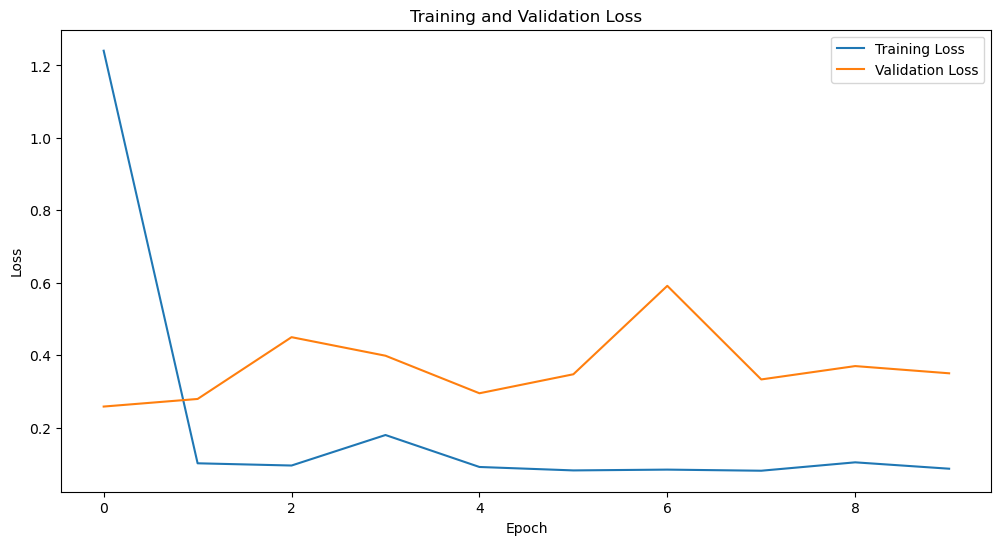

In [26]:
plt.figure(figsize=(12, 6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

<p style="background-color:#C74375;font-family:ui-rounded;color:#FFFFFF;font-size:130%;text-align:center;border-radius:10px 10px;">Confusion Matrix</p>

<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Compute confusion matrix</span>

In [28]:
true_labels = test_generator.classes

In [34]:
conf_mat = np.zeros((2, 2))
for i in range(len(true_labels)):
    true_label = true_labels[i]
    pred_label = test_pred_labels[i]
    conf_mat[true_label][pred_label] += 1

print("Confusion Matrix:")
print("True\Predicted\tNon-vehicles\tVehicles")
print("Non-vehicles\t{}\t{}".format(conf_mat[0][0], conf_mat[0][1]))
print("Vehicles\t{}\t{}".format(conf_mat[1][0], conf_mat[1][1]))

Confusion Matrix:
True\Predicted	Non-vehicles	Vehicles
Non-vehicles	791.0	106.0
Vehicles	29.0	850.0


<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Plot confusion matrix</span>

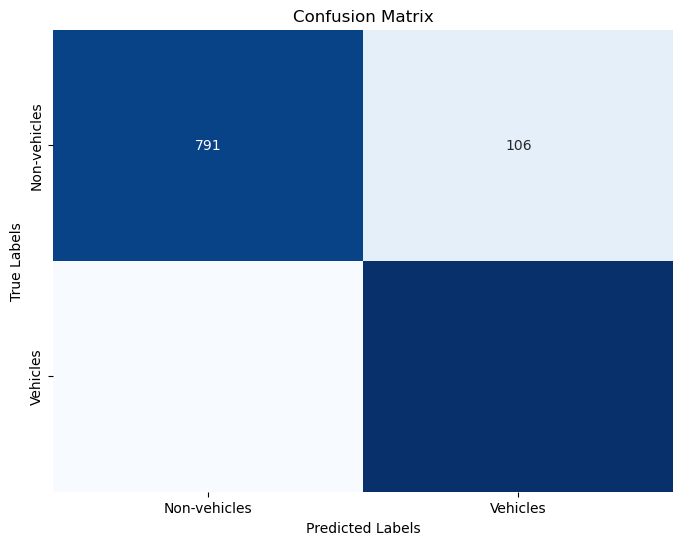

In [35]:
plt.figure(figsize=(8, 6))
sns.heatmap(conf_mat, annot=True, fmt='g', cmap='Blues', cbar=False, 
            xticklabels=['Non-vehicles', 'Vehicles'], yticklabels=['Non-vehicles', 'Vehicles'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Plot histograms of predicted probabilities
</span>

56/56 [==============================] - 11s 187ms/step


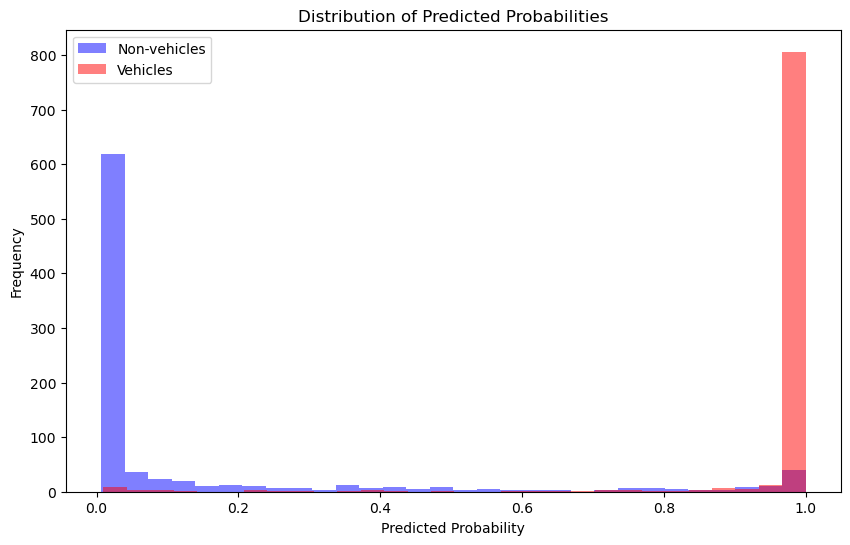

In [38]:
test_probabilities = model.predict(test_generator)

non_vehicle_probabilities = test_probabilities[test_generator.classes == 0]
vehicle_probabilities = test_probabilities[test_generator.classes == 1]

plt.figure(figsize=(10, 6))
plt.hist(non_vehicle_probabilities, bins=30, alpha=0.5, color='blue', label='Non-vehicles')
plt.hist(vehicle_probabilities, bins=30, alpha=0.5, color='red', label='Vehicles')
plt.title('Distribution of Predicted Probabilities')
plt.xlabel('Predicted Probability')
plt.ylabel('Frequency')
plt.legend()
plt.show()

<span style="font-size:24px; font-family: 'Ink Free', sans-serif; color:#C74375; font-weight:bold;">Plot the sample images with their true and predicted labels</span>

1/1 [==============================] - 0s 188ms/step


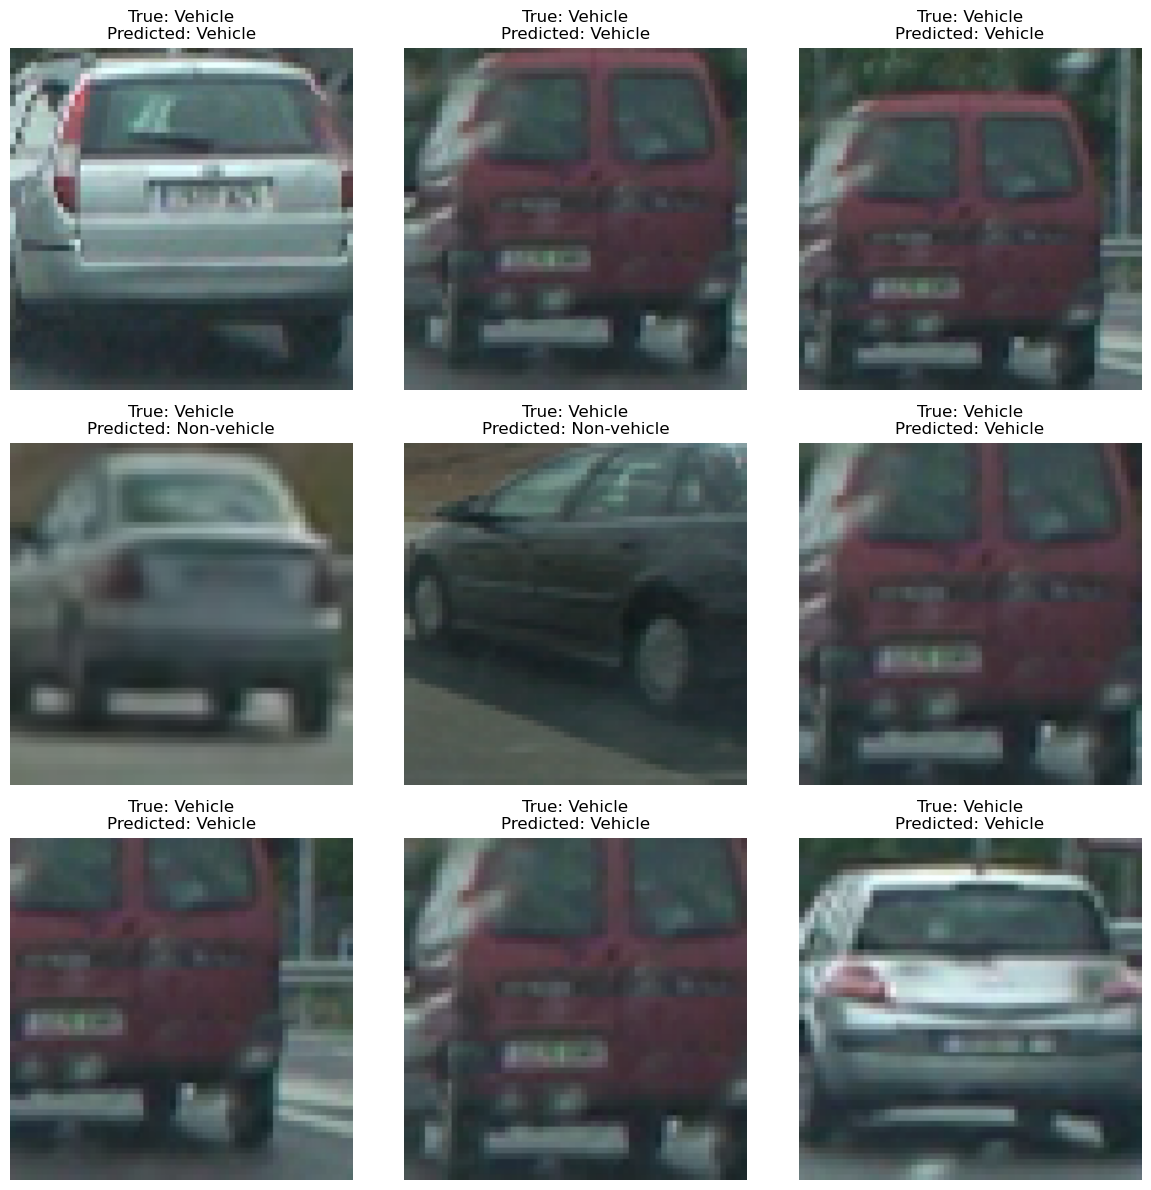

In [40]:
num_samples = 9
random_indices = random.sample(range(len(test_generator)), num_samples)

sample_images = []
true_labels = []
predicted_labels = []

for index in random_indices:
    images, labels = test_generator[index]
    sample_images.extend(images)
    true_labels.extend(labels)
    predictions = model.predict(images)
    predicted_labels.extend((predictions > 0.5).astype(int))

plt.figure(figsize=(12, 12))
for i in range(num_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].astype('uint8'))
    plt.title('True: {}\nPredicted: {}'.format(
        'Vehicle' if true_labels[i] == 1 else 'Non-vehicle',
        'Vehicle' if predicted_labels[i] == 1 else 'Non-vehicle'
    ))
    plt.axis('off')

plt.tight_layout()
plt.show()

1/1 [==============================] - 0s 204ms/step


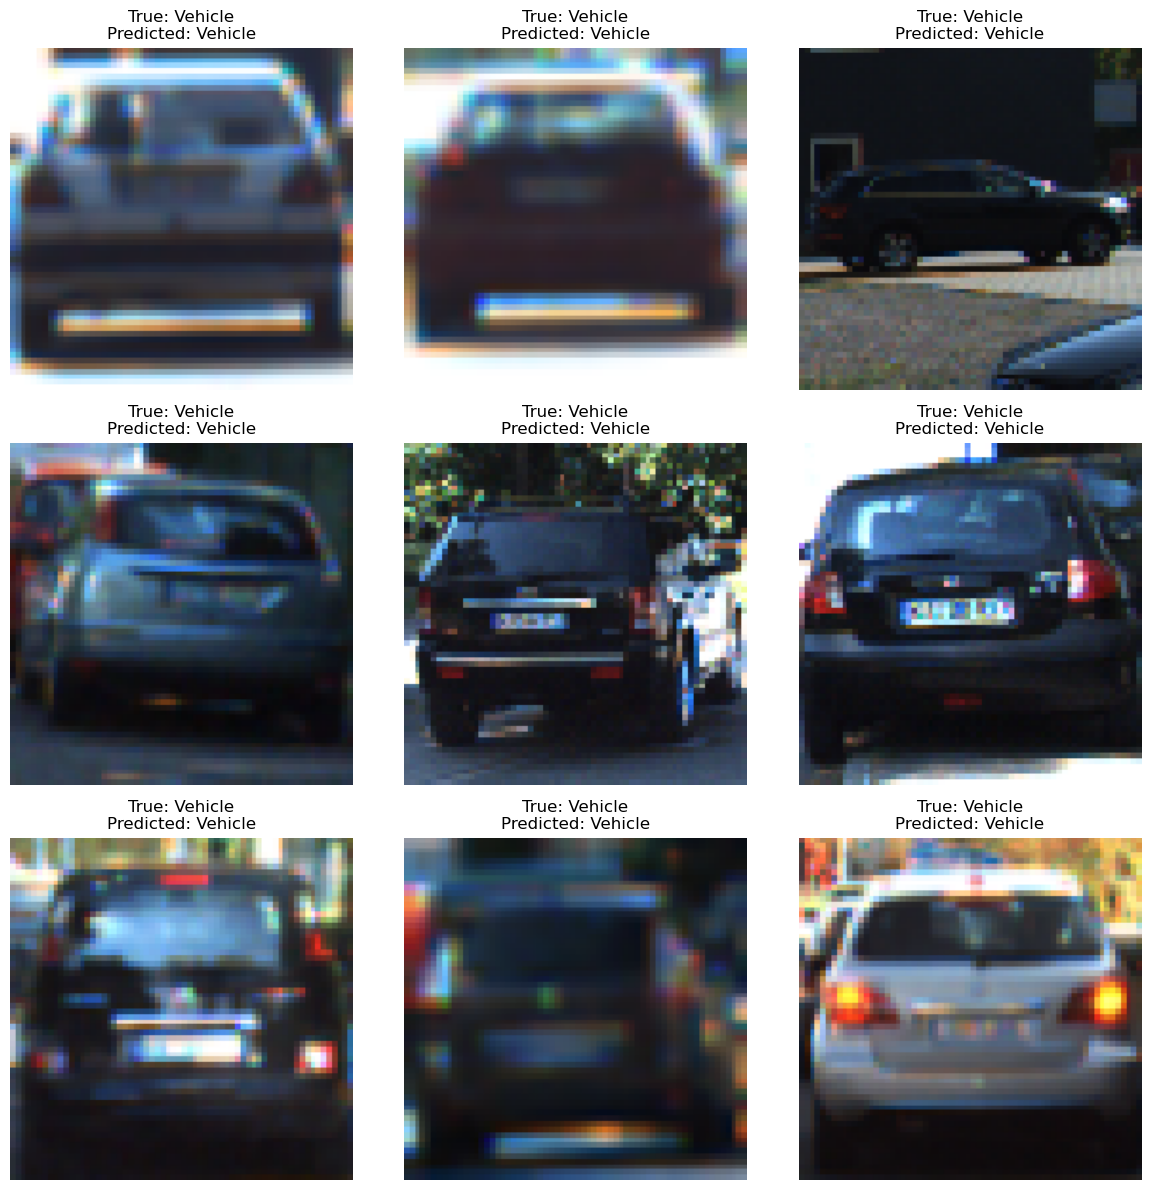

In [47]:
num_samples = 9
random_indices = random.sample(range(len(test_generator)), num_samples)

sample_images = []
true_labels = []
predicted_labels = []

for index in random_indices:
    images, labels = test_generator[index]
    sample_images.extend(images)
    true_labels.extend(labels)
    predictions = model.predict(images)
    predicted_labels.extend((predictions > 0.5).astype(int))

plt.figure(figsize=(12, 12))
for i in range(num_samples):
    plt.subplot(3, 3, i + 1)
    plt.imshow(sample_images[i].astype('uint8'))
    plt.title('True: {}\nPredicted: {}'.format(
        'Vehicle' if true_labels[i] == 1 else 'Non-vehicle',
        'Vehicle' if predicted_labels[i] == 1 else 'Non-vehicle'
    ))
    plt.axis('off')

plt.tight_layout()
plt.show()